# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

At this project, we try to scrap the information from IMDb's website. IMDb is an online database of information related to films, television series, home videos, video games, and streaming content online – including cast, production crew and personal biographies, plot summaries, trivia, ratings, and fan and critical . We will try to scrap this sites for educational purpose only. 

The components that will be measured and need to be collected are, the movie's names, imdb rating, metascore and votes, We would try to discover from the site which 7 movies was the most favourite movies from the year 2021.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [86]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [87]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [88]:
import pandas as pd

In [89]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

To parse our HTML document and extract the containers, we’ll use BeautifulSoup, the most common web scraping module for Python.

In [167]:
imdb_soup = soup.find('div', attrs={'class':'lister-list'})
print(imdb_soup.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt11286314">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt11286314/">
    <img alt="Don't Look Up" class="loadlate" data-tconst="tt11286314" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNjZjNDE1NTYtYTgwZS00M2VmLWEyODktM2FlNjhiYTk3OGU2XkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_UX67_CR0,0,


Finding row length

In [253]:
movie_containers = imdb_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
mov_con_length = len(movie_containers)
mov_con_length

<class 'bs4.element.ResultSet'>


50

find_all() returned a ResultSet object which is a list containing all the 50 divs we are interested in.

Now we’ll select only the first container, and extract, by turn, each item of interest:

- The name of the movie.
- The year of release.
- The IMDB rating.
- The Metascore.
- The number of votes.


In [95]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt11286314"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt11286314/"> <img alt="Don't Look Up" class="loadlate" data-tconst="tt11286314" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BNjZjNDE1NTYtYTgwZS00M2VmLWEyODktM2FlNjhiYTk3OGU2XkEyXkFqcGdeQXVyMTEyMjM2NDc2._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt11286314/">Don't Look Up</a>
<span class="lister-item-year text-muted unbold">(2021)</span>
</h3>
<p class="text-muted">
<span class="certificate">18+</span>
<span class="ghost">|</span>
<span class="runtime">138 min</span>
<span class="ghost">|</span>
<span class="genre">
Comedy, Drama, Sci-F

In [134]:
# Finding the title
first_movie.h3.a.text

"Don't Look Up"

In [102]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2021)</span>

In [106]:
#Finding the year
first_year = first_year.text
first_year

'(2021)'

In [109]:
# Finding the rating
first_rating = float(first_movie.strong.text)
first_rating

7.3

In [111]:
# Finding the metascore
first_mscore = first_movie.find('span', class_ = 'metascore mixed')
first_mscore = int(first_mscore.text)
print(first_mscore)

50


In [119]:
#Finding the votes
first_vote = first_movie.find('span', attrs = {'name':'nv'})
first_vote

<span data-value="285864" name="nv">285,864</span>

In [120]:
first_vote['data-value']

'285864'

In [121]:
first_vote1 = int(first_vote['data-value'])

In [129]:
some_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')
type(some_mscore)

NoneType

In [237]:
# Daftar untuk store the scraped data
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Meng ekstrak data dari individual movie container di atas
for container in movie_containers:
# If the movie has Metascore, --> then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
        # The name
        name = container.h3.a.text
        names.append(name)
        # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
        # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
        # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
        # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

## Creating data frame & Data wrangling

Put the array into dataframe

In [173]:
import pandas as pd
test_imdb = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
test_imdb.head()

,movie,year,imdb,metascore,votes
0,Don't Look Up,(2021),7.3,50,285864
1,Spider-Man: No Way Home,(2021),8.8,71,354784
2,The Matrix Resurrections,(2021),5.7,63,141918
3,Encanto,(2021),7.3,76,68350
4,The King's Man,(2021),6.8,44,12566


Data cleaning is used to plot the distribution of IMDB and Metascore ratings, and to share data sets in different ways
- Rearrange columns
- Cleaned the year column and changed the data type to int. (will be used for Data Wrangling)
- Check if there are extreme values (outliers)

In [251]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      28 non-null     object 
 1   year       28 non-null     object 
 2   imdb       28 non-null     float64
 3   metascore  28 non-null     int64  
 4   votes      28 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ KB
None


,movie,year,imdb,metascore,votes
0,Don't Look Up,(2021),7.3,50,285864
1,Spider-Man: No Way Home,(2021),8.8,71,354784
2,The Matrix Resurrections,(2021),5.7,63,141918


In [175]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Don't Look Up,(2021),7.3,50,285864
1,Spider-Man: No Way Home,(2021),8.8,71,354784
2,The Matrix Resurrections,(2021),5.7,63,141918
3,Encanto,(2021),7.3,76,68350
4,The King's Man,(2021),6.8,44,12566


In [176]:
movie_ratings['year'].unique()

array(['(2021)'], dtype=object)

In [157]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)

AttributeError: Can only use .str accessor with string values!

In [177]:
movie_ratings['year'].head()

0    (2021)
1    (2021)
2    (2021)
3    (2021)
4    (2021)
Name: year, dtype: object

In [178]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]

,imdb,metascore
min,5.2,37.0
max,8.8,89.0


In [171]:
# dapat dilihat bahwa tidak ada nilai yang ekstrim / aneh (mencurigakan)

In [179]:
movie_ratings.to_csv('movie_ratings.csv')

### Data Visualization

In [209]:
test_imdb = pd.read_csv('movie_Ratings.csv', index_col=1)
test_imdb.head()

,Unnamed: 0,year,imdb,metascore,votes
movie,,,,,
Don't Look Up,0,(2021),7.3,50,285864
Spider-Man: No Way Home,1,(2021),8.8,71,354784
The Matrix Resurrections,2,(2021),5.7,63,141918
Encanto,3,(2021),7.3,76,68350
The King's Man,4,(2021),6.8,44,12566


In [230]:
#Favourite by number of people who votes

fav_by_votes = test_imdb.sort_values('votes',ascending=False).head(7)
fav_by_votes

,Unnamed: 0,year,imdb,metascore,votes
movie,,,,,
Dune: Part One,11,(2021),8.2,74,429380
Spider-Man: No Way Home,1,(2021),8.8,71,354784
Don't Look Up,0,(2021),7.3,50,285864
Shang-Chi and the Legend of the Ten Rings,20,(2021),7.5,71,280997
The Suicide Squad,18,(2021),7.2,72,277614
No Time to Die,9,(2021),7.4,68,274122
Free Guy,26,(2021),7.2,62,251632


<AxesSubplot:title={'center':'Top 7 berdasarkan VOTES'}, ylabel='Movie Names'>

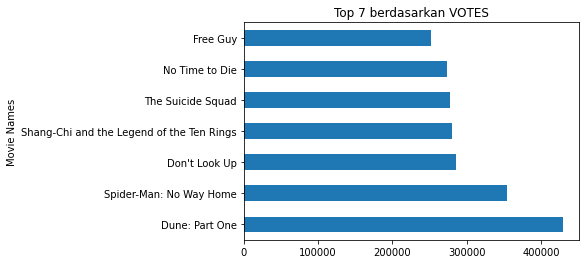

In [243]:
fav_by_votes['votes'].plot.barh(
                    title = 'Top 7 berdasarkan VOTES',
                    xlabel = 'Movie Names',
                    ylabel = 'Number of votes')

In [225]:
#Favourite by the imdb ratings

fav_by_imdb = test_imdb.sort_values('imdb',ascending=False).head(7)
fav_by_imdb

,Unnamed: 0,year,imdb,metascore,votes
movie,,,,,
Spider-Man: No Way Home,1,(2021),8.8,71,354784
Dune: Part One,11,(2021),8.2,74,429380
Licorice Pizza,5,(2021),8.1,89,9716
West Side Story,12,(2021),7.8,85,22423
Sing 2,7,(2021),7.6,49,7085
"tick, tick...BOOM!",15,(2021),7.6,74,47685
Red Rocket,27,(2021),7.5,75,4166


<AxesSubplot:title={'center':'Top 7 berdasarkan RATING'}, ylabel='Movie names'>

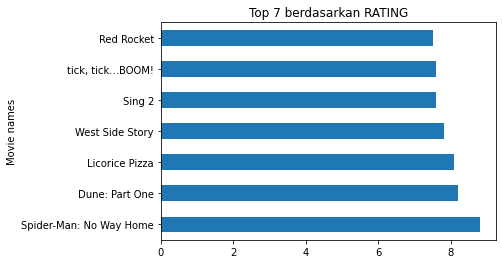

In [244]:
fav_by_imdb['imdb'].plot.barh(
                    title = 'Top 7 berdasarkan RATING',
                    xlabel = 'Movie names',
                    ylabel = 'Number of Ratings')

In [228]:
fav_by_metascore = test_imdb.sort_values('metascore',ascending=False).head(7)
fav_by_metascore

,Unnamed: 0,year,imdb,metascore,votes
movie,,,,,
Licorice Pizza,5,(2021),8.1,89,9716
The Power of the Dog,6,(2021),7.0,89,64148
The Lost Daughter,13,(2021),6.8,86,16960
West Side Story,12,(2021),7.8,85,22423
Encanto,3,(2021),7.3,76,68350
Red Rocket,27,(2021),7.5,75,4166
The French Dispatch,17,(2021),7.4,74,59596


<AxesSubplot:title={'center':'Top 7 berdasarkan METASCORE'}, ylabel='Movie Names'>

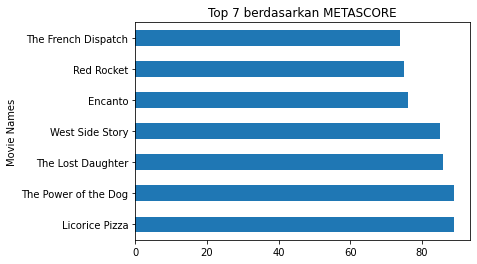

In [245]:
fav_by_metascore['metascore'].plot.barh(
                            title = 'Top 7 berdasarkan METASCORE',
                            xlabel = 'Movie Names',
                            ylabel = 'Number of Metascore')

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Top 7 berdasarkan VOTES'}, ylabel='Movie Names'>

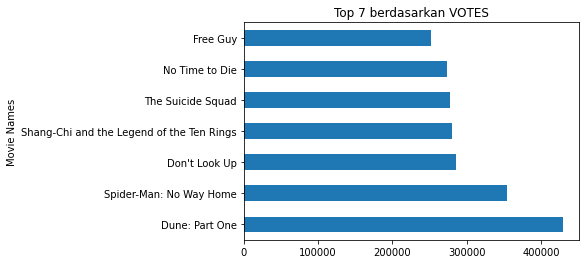

In [248]:
fav_by_votes['votes'].plot.barh(
                    title = 'Top 7 berdasarkan VOTES',
                    xlabel = 'Movie Names',
                    ylabel = 'Number of votes')

<AxesSubplot:title={'center':'Top 7 berdasarkan RATING'}, ylabel='Movie names'>

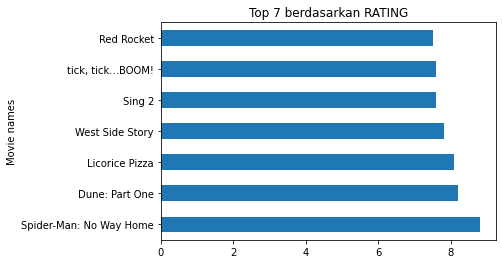

In [249]:
fav_by_imdb['imdb'].plot.barh(
                    title = 'Top 7 berdasarkan RATING',
                    xlabel = 'Movie names',
                    ylabel = 'Number of Ratings')

<AxesSubplot:title={'center':'Top 7 berdasarkan METASCORE'}, ylabel='Movie Names'>

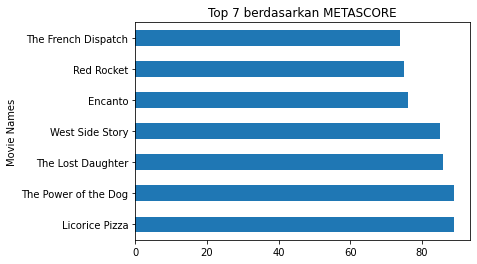

In [250]:
fav_by_metascore['metascore'].plot.barh(
                            title = 'Top 7 berdasarkan METASCORE',
                            xlabel = 'Movie Names',
                            ylabel = 'Number of Metascore')

## Conclusion

Berdasarkan data visualization di atas, dapat di simpulkan bahwa pada tahun 2021:
- Di dapatkan dari jumlah votes dapat dilihat bahwa movie dengan berjudul "Dune Part One" menempati posisi pertama dengan jumlah vote sebesar 251632
- Spiderman: No Way Home menempati posisi eprtama berdasarkan rating imdb dengan nilai 8.8. sementara di posisi terakhir di tempati oleh Red Rocket dengan nilai imdb 7.5
- Berdasarkan metascore, the French Dispatch menempati posisi 7 dengan nilai 74, sementara movie berjudul Licorice Pizza menempati posisi pertama dengan nilai 89

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.